# Анализ данных для авиакомпании F9

Мы аналитики российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Нам важно понять предпочтения пользователей, покупающих билеты на разные направления.

Нам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.
    
У нас есть файлы с результатами запросов, которые мы сделали до этого. В них модели самолетов, количество рейсов для каждой модели самолетов, города и среднее количество рейсов, прибывающих в город.

Для этих данных нам нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

   
____



В данном исследовании представлен процесс анализа предоставленных данных. Работа произведена в соответствии с инструкциями заказчика. Каждый значительный шаг сопровождается промежуточным, либо общим выводом.
 

____
    

    
    
    
Часть 1. Изучение общей информации о предоставленном датасете
    
1. Импорт необходимых библиотек для работы с данными, загрузка датасета
2. Изучение данных, получение общей информации
3. Вывод

Часть 2. Анализ данных

1. Выбор топ-10 городов по количеству рейсов
2. График зависимости модели самолетов от количества рейсов
3. График города и количество рейсов
4. График топ-10 городов и количество рейсов
5. Вывод

 ## Часть 1. Изучение общей информации о полученных датасетах

<a id='Импорт необходимых библиотек для работы с данными, загрузка датасета'>

### <p style="text-align:center"> Импорт необходимых библиотек для работы с данными, загрузка датасетов </p>

Импортируем необходимые библиотеки, убираем ограничения на количество столбцов, отключаем предупреждения.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

Загружаем датасеты, проверяем вывод.

In [2]:
data_planes = pd.read_csv('/datasets/query_1.csv')
data_cities = pd.read_csv('/datasets/query_3.csv')

In [3]:
data_planes

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
data_cities

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


<a id='Изучение данных, получение общей информации'></a>

### <p style="text-align:center"> Изучение данных, получение общей информации</p>

Ознакомимся с информацией, посмотрим соответствуют ли типы ячеек назначению.

In [5]:
data_planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
data_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
data_planes.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [8]:
data_cities.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


<a id='Вывод_1'></a>

### <p style="text-align:center"> Вывод</p>

##### В ходе первичного анализа данных были сделаны следующие выводы:

___


1. Данные изучены и проверены.

2. Типы данных в общем случае соответствуют назначению.



___

Таким образом было выполнено первичное ознакомление с предоставленной информацией, дефектов датасета не выявлено. Переходим к анализу.

 ## Часть 2. Анализ данных

<a id='Выбор топ-10 городов по количеству рейсов'></a>

### <p style="text-align:center">Выбор топ-10 городов по количеству рейсов</p>

In [9]:
data_cities.sort_values(by='average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


<a id='График зависимости модели самолетов от количества рейсов'></a>

### <p style="text-align:center">График зависимости модели самолетов от количества рейсов</p>

Объединим вместе все самолеты моделей Airbus и Boeing.

In [10]:
data_planes['just_model'] = data_planes['model'].str.split(' ').str[0]

In [11]:
data_planes

,model,flights_amount,just_model
0,Airbus A319-100,607,Airbus
1,Airbus A321-200,960,Airbus
2,Boeing 737-300,630,Boeing
3,Boeing 767-300,600,Boeing
4,Boeing 777-300,300,Boeing
5,Bombardier CRJ-200,4446,Bombardier
6,Cessna 208 Caravan,4557,Cessna
7,Sukhoi SuperJet-100,4185,Sukhoi


In [12]:
df_planes = data_planes.groupby(by='just_model', as_index=False).sum()

In [13]:
df_planes

,just_model,flights_amount
0,Airbus,1567
1,Boeing,1530
2,Bombardier,4446
3,Cessna,4557
4,Sukhoi,4185


На графике ниже представлено распределение моделей самолетов по количеству перелетов. Airbus и Boeing используются реже т.к. эти модели большегрузные, способные перевозить бОльшее количество пассажиров, либо пассажиров банально не набирается нужное количество, и дешевле использовать меньшие по грузоподъемности аналоги. Cessna имеет самое меньшее количество мест на борту, можно предположить, что на этой модели выполняют перевозки между маленькими городами. Bombardier и Sukhoi имеют примерно одинаковое количество мест, представляют золотую середину.

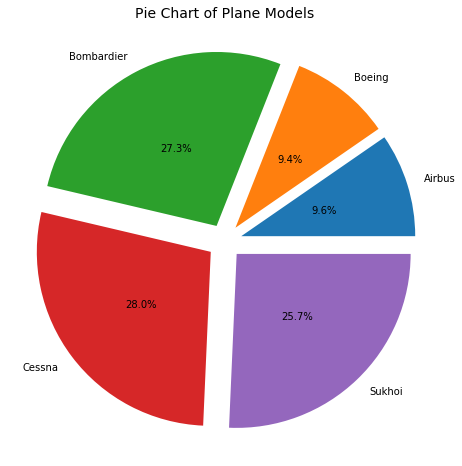

In [14]:
pie, ax = plt.subplots(figsize=[14,8])
labels = df_planes['just_model']
plt.pie(x=df_planes['flights_amount'], autopct="%.1f%%", explode=[0.1]*5, labels=labels, pctdistance=0.5)
plt.title('Pie Chart of Plane Models', fontsize=14);

<a id='График города и количество рейсов'></a>

### <p style="text-align:center">График города и количество рейсов</p>

Не показаны топ-3 города для репризентативности информации. Они будут показаны на следующем графике.

In [15]:
data_cities_wm = data_cities.drop([43, 54, 70])

In [16]:
x = data_cities_wm.loc[:, ['average_flights']]
data_cities_wm['average_flights_z'] = (x - x.mean())/x.std()

In [17]:
data_cities_wm['colors'] = ['red' if x < 0 else 'green' for x in data_cities_wm['average_flights_z']]
data_cities_wm.sort_values('average_flights_z', inplace=True)
data_cities_wm.reset_index(inplace=True)

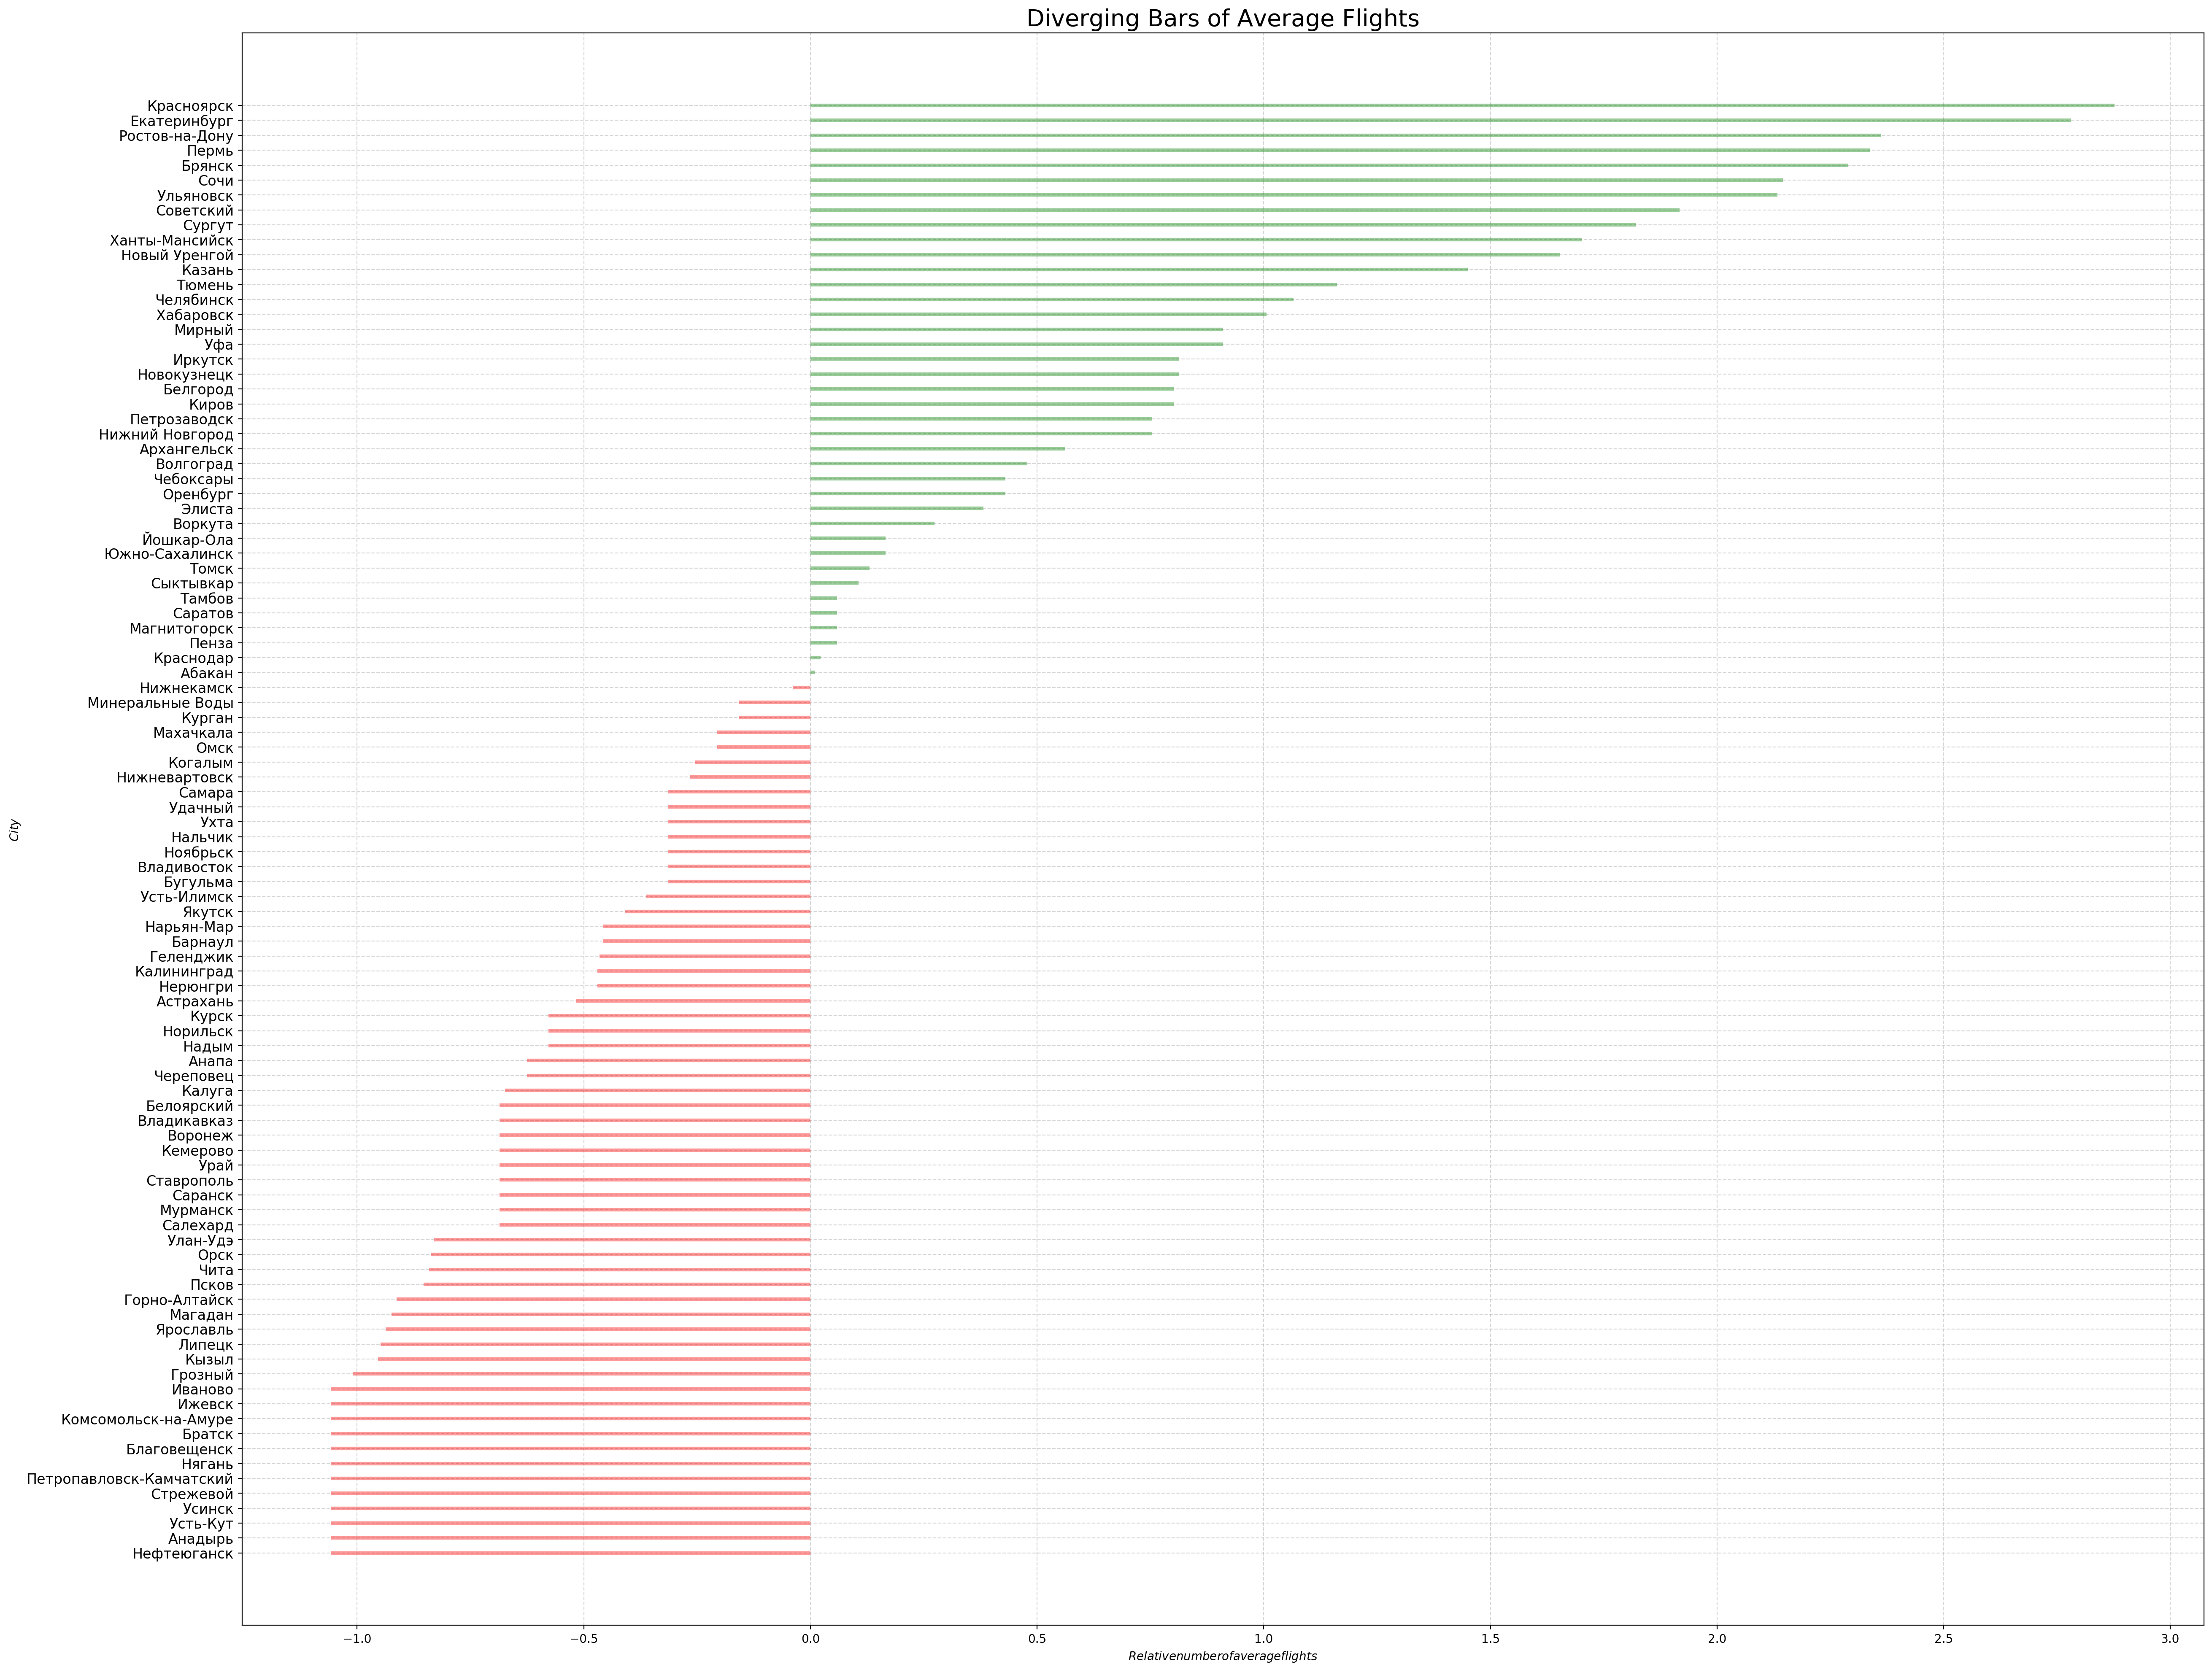

In [18]:
plt.figure(figsize=(30,25), dpi= 200)
plt.hlines(y=data_cities_wm.index, xmin=0, xmax=data_cities_wm.average_flights_z, color=data_cities_wm.colors, alpha=0.4, linewidth=3)
plt.gca().set(ylabel='$City$', xlabel='$Relative number of average flights$')
plt.yticks(data_cities_wm.index, data_cities_wm.city,  fontsize=12)
plt.title('Diverging Bars of Average Flights', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

На графике выше представлено распределение количества перелетов по городам относительно среднего количества перелетов. Как видно, зеленые города пользуются популярностью в среднем больше красных.

<a id='График топ-10 городов и количество рейсов'></a>

### <p style="text-align:center">График топ-10 городов и количество рейсов</p>

Для репрезентативности возьмем логарифм от среднего количества перелетов.

In [19]:
data_10_cities = data_cities.sort_values(by='average_flights', ascending=False).head(10)

In [20]:
data_10_cities['log_average_flights'] = np.log2(data_10_cities['average_flights'])

In [21]:
data_10_cities.sort_values('log_average_flights', inplace=True)
data_10_cities.reset_index(inplace=True)

In [22]:
data_10_cities

,index,city,average_flights,log_average_flights
0,84,Ульяновск,9.580645,3.260123
1,74,Сочи,9.612903,3.264972
2,10,Брянск,10.000000,3.321928
3,63,Пермь,10.129032,3.340424
4,67,Ростов-на-Дону,10.193548,3.349584
5,20,Екатеринбург,11.322581,3.501131
6,33,Красноярск,11.580645,3.533644
7,54,Новосибирск,17.322581,4.114582
8,70,Санкт-Петербург,31.161290,4.961683
9,43,Москва,129.774194,7.019860


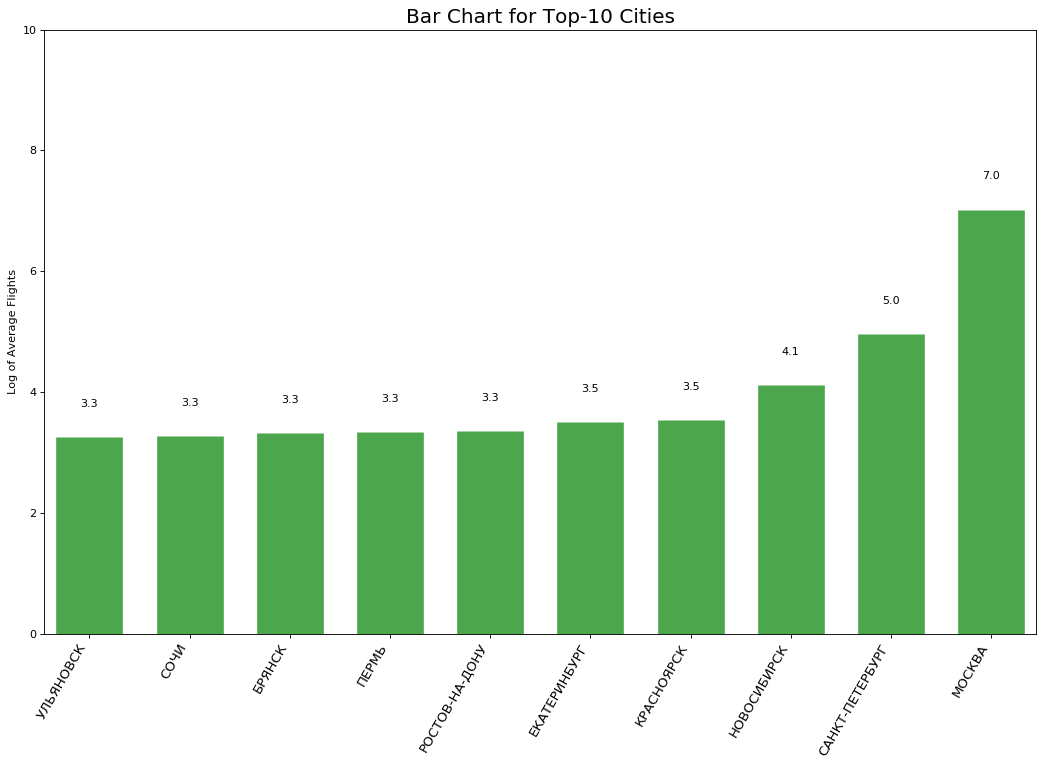

In [23]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80);
ax.vlines(x=data_10_cities.index, ymin=0, ymax=data_10_cities.log_average_flights, color='green', alpha=0.7, linewidth=60);

for i, log_average_flights in enumerate(data_10_cities.log_average_flights):
    ax.text(i, log_average_flights+0.5, round(log_average_flights, 1), horizontalalignment='center');

ax.set_title('Bar Chart for Top-10 Cities', fontdict={'size':18});
ax.set(ylabel='Log of Average Flights', ylim=(0, 10));
plt.xticks(data_10_cities.index, data_10_cities.city.str.upper(), rotation=60, horizontalalignment='right', fontsize=12);

На графике выше представлено распределение среднего количества перелетов по городам России. Использовали логарифмическую шкалу, иначе значения по Москве улетают далеко наверх.

<a id='Вывод_2'></a>

### <p style="text-align:center"> Вывод</p>

##### В ходе анализа данных были сделаны следующие выводы:

___


1. Вывели <a href='#Выбор топ-10 городов по количеству рейсов'>топ-10</a> городов по количеству рейсов. Лидирует Москва, за ней
Санкт-Петербург и Новосибирск.

2. Представили <a href='#График зависимости модели самолетов от количества рейсов'>распределение</a> моделей самолетов по количеству совершенных перелетов. Определили причины такого распределения.

3. Показали <a href='#График города и количество рейсов'>зависимость</a> количества рейсов по городам, определили более и менее популярные города.

4. Вывели <a href='#График топ-10 городов и количество рейсов'>график</a> зависимости количества рейсов по самым посещаемым городам, для репрезентативности взяли логарифм от среднего количества перелетов.

___
